Testing kernel

In [1]:
print("hello world")

hello world


Installing dependencies

In [3]:
pip install numpy matplotlib scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.2 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.7 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.9 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.9 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1.6 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 1.7 MB/s eta 0:00:03
   ----------------------- ------

In [2]:
pip install tensorflow


  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached h5py-3.14.0-cp310-cp310-win_amd64.whl (2.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
  Using cached protobuf-4.25.8-cp310-abi3-win_amd64.whl (413 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached requests-2.32.4-py3-none-any.whl (64 kB)
  Using cached markdown-3.8.2-py3-none-any.whl (106 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
  Using cached google_auth-2.40.3-py2.py3-none-any.whl (216 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
  Using cached rsa-4.9.1-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl (181 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-an

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVOVO\\Documents\\Keras\\webapp\\venv\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-13e2df515630b4a41f92893938845698.dll'
Check the permissions.



Reading dataset for analysis

In [2]:
pip install pandas


  Using cached pandas-2.3.1-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)


In [1]:
import pandas as pd

df = pd.read_csv("daily_price.csv", parse_dates=["Date"])
df = df.sort_values("Date")
print(df.head())


        Date  Petrol_Price
0 1973-01-01      0.080000
1 1973-01-02      0.080009
2 1973-01-03      0.080018
3 1973-01-04      0.080027
4 1973-01-05      0.080037


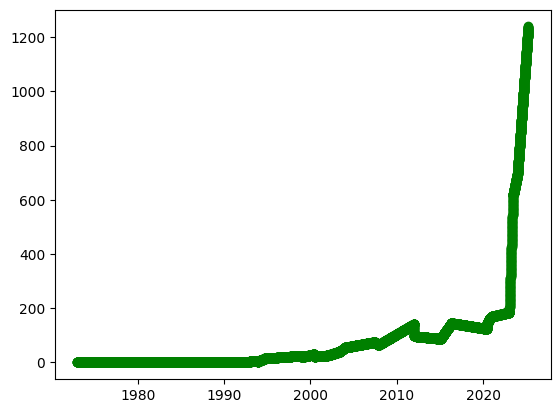

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['Date'], df['Petrol_Price'],color='green',label='Petrol_Price')

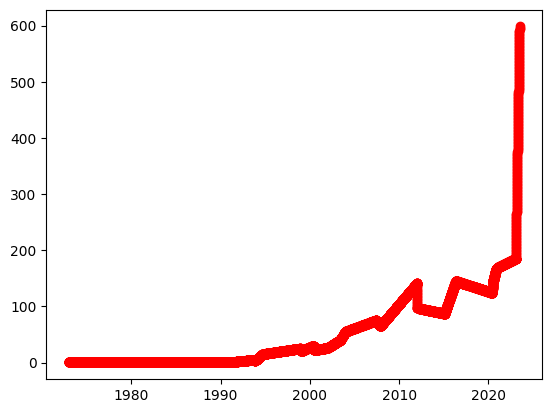

In [3]:
#Scatter plot for less than 600
df2=df[df.Petrol_Price<600]
plt.scatter(df2['Date'],df2['Petrol_Price'],color='red',label='Petrol_Price')

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#preprocessing the data
df = pd.read_csv("daily_price.csv", parse_dates=["Date"])
df = df.sort_values("Date")

scaler = MinMaxScaler()
df['Scaled_Price'] = scaler.fit_transform(df[['Petrol_Price']])

# Create sequences (e.g., 30 days window)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 30
prices = df['Scaled_Price'].values
X, y = create_sequences(prices, window_size)


In [7]:
X = X.reshape((X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]


In [8]:
#split data into train and test set i.e reshape data into 3D
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


Implementing the LSTM model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#build and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#complete formal propagation and forward propagation is 1 epoch. 100 for accuracy
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/100
477/477 [==============================] - 112s 164ms/step - loss: 1.3258e-05 - val_loss: 8.1978e-04
Epoch 2/100
477/477 [==============================] - 67s 141ms/step - loss: 6.9113e-07 - val_loss: 8.4135e-04
Epoch 3/100
477/477 [==============================] - 67s 140ms/step - loss: 7.6836e-07 - val_loss: 6.5491e-04
Epoch 4/100
477/477 [==============================] - 89s 187ms/step - loss: 5.4787e-07 - val_loss: 7.9727e-04
Epoch 5/100
477/477 [==============================] - 78s 164ms/step - loss: 6.4328e-07 - val_loss: 5.6712e-04
Epoch 6/100
477/477 [==============================] - 84s 176ms/step - loss: 6.4422e-07 - val_loss: 4.5206e-04
Epoch 7/100
477/477 [==============================] - 83s 174ms/step - loss: 4.1088e-07 - val_loss: 3.1762e-04
Epoch 8/100
477/477 [==============================] - 81s 169ms/step - loss: 4.7483e-07 - val_loss: 3.9295e-04
Epoch 9/100
477/477 [==============================] - 87s 183ms/step - loss: 4.4754e-07 - val_loss: 3.

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#evaluate the model by inverse transforming the data to obtain the mean square data
predicted = model.predict(X_test)
predicted_rescaled = scaler.inverse_transform(predicted)
actual_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(actual_rescaled, predicted_rescaled)
mse = mean_squared_error(actual_rescaled, predicted_rescaled)
rmse = np.sqrt(mean_squared_error(actual_rescaled, predicted_rescaled))
mape = mean_absolute_percentage_error(actual_rescaled, predicted_rescaled) * 100
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}")


120/120 [==============================] - 16s 59ms/step
MAE: 2.61, MSE: 49.37, RMSE: 7.03, MAPE: 0.31


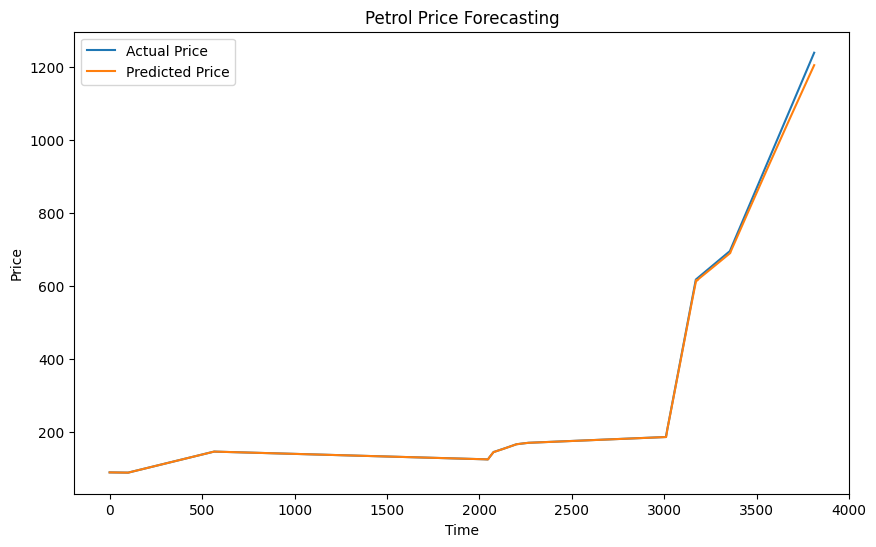

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(actual_rescaled, label='Actual Price')
plt.plot(predicted_rescaled, label='Predicted Price')
plt.title('Petrol Price Forecasting')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#make future forecasts
last_sequence = prices[-window_size:].reshape((1, window_size, 1))
next_price_scaled = model.predict(last_sequence)
next_price = scaler.inverse_transform(next_price_scaled)
day_2 = next_price
print("Predicted next day's petrol price:", next_price[0][0])


1/1 [==============================] - 0s 492ms/step
Predicted next day's petrol price: 1206.3059


In [13]:
model.save('petrol_forecast_model.keras')

In [14]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [15]:
predictions = []
current_sequence = prices[-window_size:].reshape((1, window_size, 1)) # Initialize with the last known sequence

for _ in range(7): # Loop for 7 days
    next_price_scaled = model.predict(current_sequence)
    next_price = scaler.inverse_transform(next_price_scaled)[0][0]

    predictions.append(next_price)

    current_sequence = np.roll(current_sequence, -1)
    current_sequence[0, -1, 0] = next_price 

    print("Predicted petrol prices for the next week:", predictions)

1/1 [==============================] - 0s 78ms/step
Predicted petrol prices for the next week: [1206.3059]
1/1 [==============================] - 0s 206ms/step
Predicted petrol prices for the next week: [1206.3059, 2408.063]
1/1 [==============================] - 0s 94ms/step
Predicted petrol prices for the next week: [1206.3059, 2408.063, 2973.13]
1/1 [==============================] - 0s 219ms/step
Predicted petrol prices for the next week: [1206.3059, 2408.063, 2973.13, 3221.2192]
1/1 [==============================] - 0s 78ms/step
Predicted petrol prices for the next week: [1206.3059, 2408.063, 2973.13, 3221.2192, 3319.5195]
1/1 [==============================] - 0s 102ms/step
Predicted petrol prices for the next week: [1206.3059, 2408.063, 2973.13, 3221.2192, 3319.5195, 3347.5063]
1/1 [==============================] - 0s 170ms/step
Predicted petrol prices for the next week: [1206.3059, 2408.063, 2973.13, 3221.2192, 3319.5195, 3347.5063, 3344.101]


In [17]:
#make future forecasts
last_sequence = prices[-window_size:].reshape((1, window_size, 1))
next_price_scaled = model.predict(last_sequence)
next_price = scaler.inverse_transform(next_price_scaled)
day_2 = next_price_scaled
print("Predicted next day's petrol price:", next_price[0][0])

1/1 [==============================] - 1s 650ms/step
Predicted next day's petrol price: 1206.3059


In [20]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import joblib

# Load dataset
data = pd.read_csv("daily_price.csv")

# Extract price column
prices = data['Petrol_Price'].values.reshape(-1, 1)

# Fit scaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(prices)

# Save scaler
joblib.dump(scaler, "scalerr.pkl")


['scalerr.pkl']

In [ ]:
model.save('petrol_forecast.keras')